# Principio de Inversión de Dependencias (Dependency Inversion Principle)

## Introducción
El principio de inversión de dependencias (DIP) establece que los módulos de alto nivel no deben depender de módulos de bajo nivel, sino de abstracciones. Las abstracciones no deben depender de los detalles, sino los detalles de las abstracciones.

## Objetivos
- Comprender el principio de inversión de dependencias y su impacto en la arquitectura de software.
- Identificar dependencias rígidas en código Python.
- Aplicar el DIP para lograr sistemas desacoplados y flexibles.

## Ejemplo de la vida real
En una empresa, los empleados (alto nivel) no dependen de un tipo específico de transporte para llegar al trabajo (bajo nivel), sino de la abstracción "transporte" (puede ser bus, bicicleta, auto, etc.).

# Principio de Inversión de Dependencias (Dependency Inversion Principle, DIP)

## Introducción

El Principio de Inversión de Dependencias (DIP) es uno de los cinco principios SOLID de diseño orientado a objetos. Fue introducido por Robert C. Martin y establece que los módulos de alto nivel no deben depender de módulos de bajo nivel, ambos deben depender de abstracciones. Además, las abstracciones no deben depender de los detalles, los detalles deben depender de las abstracciones.

## Explicación Detallada

### Definición

- **DIP**: Los módulos de alto nivel no deben depender de módulos de bajo nivel. Ambos deben depender de abstracciones. Las abstracciones no deben depender de los detalles, los detalles deben depender de las abstracciones. En otras palabras, los módulos de alto nivel no deben depender de los módulos de bajo nivel, sino de abstracciones.

### Beneficios del DIP

1. **Flexibilidad**: Facilita el cambio de implementaciones sin afectar a los módulos de alto nivel.

2. **Mantenibilidad**: Mejora la mantenibilidad del código al reducir las dependencias directas entre módulos.

3. **Reusabilidad**: Promueve la creación de componentes reutilizables y desacoplados.

## Ejemplos Explicados

### Ejemplo Correcto

Supongamos que estamos desarrollando una aplicación para enviar notificaciones. Aplicando el DIP, podríamos tener las siguientes interfaces y clases:

In [1]:
from abc import ABC, abstractmethod

class Notifier(ABC):
    @abstractmethod
    def send(self, message: str) -> None:
        pass

class EmailNotifier(Notifier):
    def send(self, message: str) -> None:
        print(f"Enviando email: {message}")

class SMSNotifier(Notifier):
    def send(self, message: str) -> None:
        print(f"Enviando SMS: {message}")

class NotificationService:
    def __init__(self, notifier: Notifier) -> None:
        self.notifier: Notifier = notifier

    def notify(self, message: str) -> None:
        self.notifier.send(message)

In [2]:
# Ejemplo de uso
email_notifier = EmailNotifier()
sms_notifier = SMSNotifier()

In [3]:
notification_service = NotificationService(email_notifier)
notification_service.notify("Hola por email")

notification_service = NotificationService(sms_notifier)
notification_service.notify("Hola por SMS")

Enviando email: Hola por email
Enviando SMS: Hola por SMS


#### Análisis del Ejemplo Correcto

- **Notifier**: Es una interfaz que define el método `send`.

- **EmailNotifier** y **SMSNotifier**: Son implementaciones concretas de la interfaz `Notifier`.

- **NotificationService**: Depende de la abstracción `Notifier` y no de las implementaciones concretas.

Este diseño permite cambiar la implementación del notificador sin modificar el `NotificationService`.

### Ejemplo de Violación del DIP

Veamos un ejemplo donde se viola el DIP:

In [4]:
class EmailNotifier:
    def send(self, message: str) -> None:
        print(f"Enviando email: {message}")

class NotificationService:
    def __init__(self) -> None:
        self.email_notifier = EmailNotifier()

    def notify(self, message: str) -> None:
        self.email_notifier.send(message)

In [5]:
# Ejemplo de uso
notification_service = NotificationService()
notification_service.notify("Hola por email")

Enviando email: Hola por email


#### Análisis del Ejemplo Incorrecto

- **NotificationService**: Depende directamente de la implementación concreta `EmailNotifier`.

- Si en el futuro queremos cambiar la implementación de `EmailNotifier` por `SMSNotifier`, deberemos modificar el `NotificationService`.

Este diseño viola el DIP porque cualquier cambio en la forma de enviar notificaciones requerirá modificar el `NotificationService`.

## Conclusión

1. **Desacoplamiento**: El DIP promueve el desacoplamiento entre módulos de alto y bajo nivel.

2. **Flexibilidad**: Facilita el cambio de implementaciones sin afectar a los módulos de alto nivel.

3. **Mantenibilidad**: Mejora la mantenibilidad del código al reducir las dependencias directas entre módulos.

4. **Reusabilidad**: Promueve la creación de componentes reutilizables y desacoplados.

Aplicar el DIP puede requerir la creación de interfaces y abstracciones adicionales, pero los beneficios en términos de flexibilidad y mantenibilidad del software son significativos.

## Ejercicios prácticos y preguntas de reflexión

1. **Identifica dependencias rígidas**: Analiza un módulo que dependa directamente de implementaciones concretas. ¿Cómo podrías introducir una abstracción?
2. **Refactoriza**: Usa interfaces o clases abstractas para desacoplar módulos de alto y bajo nivel.
3. **Pregunta de reflexión**: ¿Qué ventajas aporta el DIP en proyectos donde los requisitos cambian frecuentemente?

## Autoevaluación
- ¿Mis módulos de alto nivel dependen de abstracciones y no de detalles?
- ¿Qué patrones de diseño ayudan a implementar el DIP?

## Referencias y recursos
- [Dependency Inversion Principle – Wikipedia](https://en.wikipedia.org/wiki/Dependency_inversion_principle)
- [SOLID Principles en Python – Real Python](https://realpython.com/solid-principles-python/)
- [Ejemplo didáctico de DIP – Refactoring Guru](https://refactoring.guru/es/design-patterns/dependency-inversion-principle)

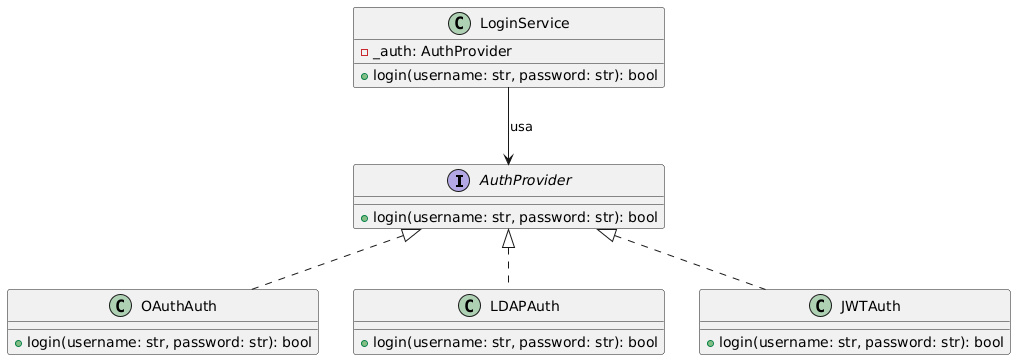

In [6]:
class OAuthAuth:
    def login(self, username: str, password: str) -> bool:
        print("Autenticando con OAuth…")
        return username == "andres" and password == "123"

class LDAPAuth:
    def login(self, username: str, password: str) -> bool:
        print("Autenticando con LDAP…")
        return username == "corp__user" and password == "ldap!"

class LoginService:
    def __init__(self, provider: str) -> None:
        self.provider: str = provider

    def login(self, username: str, password: str) -> bool:
        if self.provider == "oauth":
            auth = OAuthAuth()
        elif self.provider == "ldap":
            auth = LDAPAuth()
        else:
            raise ValueError("Proveedor no soportado")

        ok = auth.login(username, password)
        if ok:
            print("Login OK")
        else:
            print("Login FAILED")
        return ok

# Uso
svc = LoginService("oauth")
svc.login("andres", "123")
svc = LoginService("JWT") # Dara Error
svc.login("andres", "123")


Autenticando con OAuth…
Login OK


ValueError: Proveedor no soportado

In [14]:
from abc import ABC, abstractmethod

class AuthProvider(ABC):
    @abstractmethod
    def login(self, username: str, password: str) -> bool:
        pass

class OAuthAuth(AuthProvider):
    def login(self, username: str, password: str) -> bool:
        print("Auth con OAuth")
        return username == "andres" and password == "123"

class LDAPAuth(AuthProvider):
    def login(self, username: str, password: str) -> bool:
        print("Auth con LDAP")
        return username == "corp_andres" and password == "ldap!"

class JWTAuth(AuthProvider):
    def login(self, username: str, password: str) -> bool:
        print("Auth con JWT")
        return username == "token_user" and password == "jwt$"

class LoginService:
    def __init__(self, auth: AuthProvider) -> None:
        self._auth = auth

    def login(self, username: str, password: str) -> bool:
        ok = self._auth.login(username, password)
        if ok:
            print("Login OK")
        else:
            print("Login FAILED")
        return ok


In [16]:
svc = LoginService(OAuthAuth())
svc.login("andres", "123")

svc = LoginService(JWTAuth())
svc.login("token_user", "jwt$")

Auth con OAuth
Login OK
Auth con JWT
Login OK


True